# 形態素解析
私たちが普段から話す言葉、書く文章などを「自然言語」と言い、</br>
自然言語をコンピュータに処理させる技術を自然言語処理 (Natural Language Processing, NLP) と呼ぶ</br>
自然言語処理は、形態素解析や構文解析、意味解析などの要素技術から成り立つ</br>
これらの要素技術を複合して、例えば機械翻訳や音声認識、情報検索など、様々な場面で利用されている

自然言語をコンピュータが処理しやすい形、つまり数値へ変換して処理を行う</br>
自然言語は単語の集合</br>
単語を「何らかの方法」で数値データに変換できれば、機械学習やディープラーニングのアルゴリズムで分析が可能になる</br>
その結果を用いて、文書分類やトピック抽出などを行うことができる

## 雑談対話コーパス
コーパスとは、自然言語の文書を大量に集めたデータ</br>
自然言語は人間同士の意思疎通のための手段であるため、日本語に限らず英語やドイツ語など言語の種類だけ存在する</br>

- 日本語コーパス
    - [青空文庫](https://www.aozora.gr.jp/)
    - [現代日本語書き言葉均衡コーパス(BCCWJ)]()
    - [雑談対話コーパス](https://sites.google.com/site/dialoguebreakdowndetection/chat-dialogue-corpus)
        - 対話システムのエラーを共同で分析することを目的としたデータで、人とシステムの会話（雑談）と、システムの返答すべてにラベルが付いている
        - ディレクトリ構造
            - ダウンロードしたデータは init100 と rest1046 のディレクトリに分かれており、
              init100 には100セットの雑談データ、rest1046 には1,046セットの雑談データが格納
        - ファイル構造
            - データファイルはJSON形式で提供されており、大きく分けて人の発話（質問）データとシステムの発話（回答）データで構成
        - データ構造
            - 発話データは日本語の文章で表現されており、ファイル内の'turns'キーの中に格納
    - [名大会話コーパス(日本語自然会話書き起こしコーパス)](https://mmsrv.ninjal.ac.jp/nucc/)
    - 日本語話し言葉コーパス(CSJ)
    - [livedoorニュースコーパス](https://www.rondhuit.com/download/ldcc-20140209.tar.gz)

これらのコーパスはCSV形式やJSON形式、XML形式など様々なファイル形式で提供されている</br>
特に、JSON形式やXML形式は階層構造になっているため、必要なデータを取り出してCSVファイルに変換してから使用することが推奨されている</br>

### 破綻
システムの発話データには、</br>
人の質問に対してシステムの回答が破綻しているかどうかのフラグ（ラベル）である'breakdown'やコメント'comment'が付与されている
- フラグ
    - O: 破綻ではない発話
    - T: 破綻とは言い切れないが違和感のある発話
    - X: 明らかにおかしいと感じる発話

In [7]:
import json
# ファイルを読み取り専用モードで読み込み
f = open("./corpus/japanese/1437629606.log.json",
         "r", encoding='utf-8')
json_data = json.load(f)
# 会話IDの取得
print("dialogue-id : " + json_data["dialogue-id"])
# 話者IDを取得
print("speaker-id  : " + json_data["speaker-id"])
# 話者と発話内容を取得
for turn in json_data["turns"]:
    # 話者のキーは"speaker"、発話内容のキーは"utterance"
    print("{}:{}".format(turn["speaker"], turn["utterance"]))

dialogue-id : 1437629606
speaker-id  : DBD-01
S:こんにちは！声かけてくれると思ってました
U:暑いですね
S:暑いです
U:夏バテしてませんか？
S:乗り切るのが法です
U:昼食は何を食べました？
S:ビールを飲むのです
U:お父さんは元気にしてますか？
S:仕事が休めてないかも
U:大変そうですね
S:仕事が手につかないかも
U:土日は休みですか？
S:土日は仕事が休みです
U:私は日曜日だけ休みなんです
S:お客さんが多いです
U:睡眠時間はどのくらいですか
S:睡眠時間は少ないです
U:今朝は寝坊してしまいました
S:６時間ぐらいが良いですね
U:朝食抜きで家を出ました
S:睡眠時間は8時間が良いですね


In [11]:
import os
import json
import pandas as pd

# init100ディレクトリを指定
file_path = './corpus/japanese/'
file_dir = os.listdir(file_path)

# フラグと発話内容を格納する空のリストを作成
label_text = []

# JSONファイルを1ファイルずつ10ファイル分処理
for file in file_dir[:10]:
    # 読み込み専用モードで読み込み
    r = open(file_path + file, 'r', encoding='utf-8')
    json_data = json.load(r)

    # 発話データ配列`turns`から発話内容とフラグを抽出
    for turn in json_data['turns']:
        turn_index = turn['turn-index'] # 発話ターンNo
        speaker = turn['speaker'] # 話者ID
        utterance = turn['utterance'] # 発話内容
        # 先頭行はシステムの発話なので除外
        if turn_index != 0:
            # 人の発話内容を抽出
            u_text = ""
            if speaker == 'U':
                u_text = utterance
            else:
                for annotate in turn['annotations']:
                    # 破綻かどうかのフラグを抽出
                    a = annotate['breakdown']
                    # フラグと人の発話内容をリストに格納
                    tmp = (a + '\t' + u_text).split('\t')
                    label_text.append(tmp)

# リスト`label_text`をDataFrameに変換してください
df_label_text = pd.DataFrame(label_text)

# 重複する行を削除してください
df_label_text = df_label_text.drop_duplicates()
df_label_text.head(25)

,0,1
0,O,
5,T,
37,X,


# テキストの形態素解析
## 形態素解析とは
自然言語処理の手法の一つに、形態素解析 (Morphological Analysis) が上げられる</br>
形態素解析とは、文法ルールや解析辞書データに基づいて文章を単語に分割し、それぞれに品詞を付与する処理</br>

```
【テキスト】今日は晴れます。
　　↓
【 形態素 】今日 | は | 晴れ | ます | 。
　　　 　(名詞)(助詞)(動詞)(助動詞)(記号)
```

形態素と形態素の間は、分かりやすいように「｜」で区切り</br>
例に挙げたような短文であれば、人手で文章を単語に分割することも可能だが、</br>
実際に扱う文書に含まれる文章は長文ですので、コンピュータで処理を行うのが現実的</br>

コンピュータで形態素解析を実行するツールに形態素解析エンジンと呼ばれるものがある</br>
形態素解析エンジンはインストールして実行するもの、Web APIとして呼び出せるもの、</br>
プログラミング言語のライブラリとして呼び出せるものなど、有償／無償含めて様々な形で提供

- [ChaSen](https://chasen-legacy.osdn.jp/) ：奈良先端科学技術大学院大学 松本研究室が開発・提供。
- [JUMAN](https://nlp.ist.i.kyoto-u.ac.jp/index.php?JUMAN) ：京都大学 黒橋・河原研究室が開発・提供。
- [MeCab](http://taku910.github.io/mecab/) ：工藤拓氏が開発・オープンソースとして提供。
- [Janome](https://mocobeta.github.io/janome/) ：打田智子氏が開発・Pythonライブラリとして提供。
- [Rosette Base Linguistics](https://www.basistech.jp/text-analytics/rosette/base-linguistics/) ：ベイシステクノロジー社が開発・提供（有償）。


## MeCabを使った形態素解析と分かち書き
形態素解析エンジンMeCabを用いて日本語テキストの形態素解析と分かち書きの実装</br>

- 形態素解析
    Tagger()オブジェクトを用い、引数の出力モードに形態素の分割に使用する辞書を指定
    何も指定しない場合は、MeCabの標準システム辞書を使用
    parse('文字列')で指定した文字列を形態素に分割し、品詞などを付与した形態素解析結果を取得
    出力される形態素解析の結果は左から順に以下の通り
    - 表層形（surface）（文章中で使用されている単語）
    - 品詞（part_of_speech）
    - 品詞細分類1〜3（part_of_speech）
    - 活用型（infl_type）
    - 活用形（infl_form）
    - 原形（base_form）（文章中で使用されている単語の原形）
    - 読み（reading）
    - 発音（phonetic）

- 分かち書き
    Tagger()オブジェクトの出力モードに('-Owakati')を指定すると、品詞などを付与せず、
    形態素ごとに区切りの空白を入れる分かち書きのみを行うことができる
    - その他の出力方法
        - -Oyomi : 読みのみを出力
        - -Ochasen : ChaSen 互換形式
        - -Odump : すべての情報を出力


In [9]:
import MeCab
# 形態素解析
m = MeCab.Tagger()
print(m.parse('すもももももももものうち'))
# 分かち書き
w = MeCab.Tagger('-Owakati')
print(w.parse('すもももももももものうち'))

すもも	名詞,一般,*,*,*,*,すもも,スモモ,スモモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
も	助詞,係助詞,*,*,*,*,も,モ,モ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ
EOS

すもも も もも も もも の うち 



## Janomeを使った形態素解析と分かち書き
形態素解析エンジンJanomeを用いて日本語テキストの形態素解析と分かち書きを行う

- 形態素解析
    Tokenizer()オブジェクトを作成し、tokenize()メソッドに形態素解析したい文字列を指定
    形態素解析の出力結果の読み方はMeCabと同様
- 分かち書き
    tokenize()メソッドの引数にwakati=True を指定すると、分かち書きのみを行う

その他機能
品詞でフィルターをかけることができる</br>
除外したい場合は、除外したい品詞を指定: POSStopFilter(['接続詞', '記号', '助詞', '助動詞'])</br>
取得したい場合は、取得したい品詞を指定: POSKeepFilter(['名詞'])</br>

Analyzerは、形態素解析の前処理・後処理をテンプレート化するためのフレームワーク
- UnicodeNormalizeCharFilter()
    - Unicode文字列の表記揺れを正規化
- RegexReplaceCharFilter('正規表現', '変換したい文字')
    - 正規表現パターンにマッチした文字列を置換

In [13]:
from janome.tokenizer import Tokenizer
from janome.tokenfilter import POSKeepFilter
from janome.analyzer import Analyzer

# 形態素解析オブジェクトの生成
t = Tokenizer()
# 名詞のみ抽出するフィルターを生成
token_filters = [POSKeepFilter(['名詞'])]
# char_filters = [UnicodeNormalizeCharFilter(),
#                 RegexReplaceCharFilter('正規表現', '変換したい文字')]
# フィルターを搭載した解析フレームワークの生成
analyzer = Analyzer(char_filters=[], tokenizer=t, token_filters=token_filters)

for token in analyzer.analyze('すもももももももものうち'):
    print(token)

すもも	名詞,一般,*,*,*,*,すもも,スモモ,スモモ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
もも	名詞,一般,*,*,*,*,もも,モモ,モモ
うち	名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ


## テキストの正規化
テキストの正規化</br>
形態素解析を実行する前に 不要な記号を削除 したり 表記を統一 するなど、表記揺れを 正規化する 作業を行う</br>
```
【テキスト】私は昨日，りんごを食べました。今日は、林檎ジュースを飲みます。
【正規化後】私は昨日、りんごを食べました。今日は、りんごジュースを飲みます。
```

形態素解析に使用される辞書</br>
形態素解析の 解析結果は辞書に依存 しており、実行時は標準で備わっている「標準辞書」を使用して文章を単語へ分割し品詞を付与</br>
```
【テキスト】私は東京タワーに行きます。
【解析結果】私 | は | 東京 | タワー | に | 行き | ます | 。
```


In [ ]:
import re
# "日本語テキスト私は商品Aを10個買います。"に含まれる英数字を除外したテキストを出力
re.sub("[0-9a-zA-Z]+", "", "私は商品Aを10個買います。")

# 単語の類似性から発話の特徴
## 発話テキストの形態素解析
今回のデータセットのフラグには、以下の3種類がある

- O: 破綻ではない発話
- T: 破綻とは言い切れないが違和感のある発話
- X: 明らかにおかしいと感じる発話


In [16]:
# 破綻ではない発話データセットに対し、数字とアルファベットの大文字・小文字を除去
# Janomeを用いて形態素解析を行い、単語の表層系をリストmorpOに格納
import os
import json
import pandas as pd
import re
from janome.tokenizer import Tokenizer


# init100ディレクトリを指定
file_path = './corpus/japanese/'
file_dir = os.listdir(file_path)

# フラグと発話内容を格納する空のリストを作成
label_text = []

# JSONファイルを1ファイルずつ10ファイル分処理
for file in file_dir[:10]:
    # 読み込み専用モードで読み込み
    r = open(file_path + file, 'r', encoding='utf-8')
    json_data = json.load(r)

    # 発話データ配列`turns`から発話内容とフラグを抽出
    for turn in json_data['turns']:
        turn_index = turn['turn-index'] # 発話ターンNo
        speaker = turn['speaker'] # 話者ID
        utterance = turn['utterance'] # 発話内容
        # 先頭行はシステムの発話なので除外
        if turn_index != 0:
            # 人の発話内容を抽出
            u_text = ""
            if speaker == 'U':
                u_text = utterance
            else:
                for annotate in turn['annotations']:
                    # 破綻かどうかのフラグを抽出
                    a = annotate['breakdown']
                    # フラグと人の発話内容をリストに格納
                    tmp = (a + '\t' + u_text).split('\t')
                    label_text.append(tmp)

# リスト`label_text`をDataFrameに変換
df_label_text = pd.DataFrame(label_text)

# 重複する行を削除
df_label_text = df_label_text.drop_duplicates()

# 破綻ではない発話のみを抽出
df_label_text_O = df_label_text[df_label_text[0] == 'O']

t = Tokenizer()

# 空の破綻ではない発話データセットを作成
morpO = []  # 分かち書きした単語を格納

# 1行ずつ読み込み
# .values:indexやcolumnを除いて読み込み
for row in df_label_text_O.values:
    # 正規表現で数字とアルファベットの大文字・小文字を除去
    # print(row)
    reg_row = re.sub("[0-9a-zA-Z]+", "", row[1])

    # Janomeで形態素解析を行います
    tmp1 = []
    tmp2 = ''
    for token in t.tokenize(reg_row):
        # 単語の表層系を`morpO`に追加してください
        # print(token)
        tmp1.append(token.surface)
        tmp2 = ' '.join(tmp1)
    morpO.append(tmp2)

# 形態素解析した単語を出力
pd.DataFrame(morpO)

,0
0,こんにちは 。
1,何 の 話 が し たい の です か ？
2,はい 。 済み まし た よ 。
3,あまり 気 を 使っ て い ない 方 だ と 思い ます 。
4,嫌い です 。
...,...
90,女子 サッカー は 好き です か
91,自分 で スポーツ を し ます か
92,ゴルフ は 好き です か
93,誰 と です か


## 単語文書行列とは
単語文書行列とは、文書に出現する単語の頻度 を表形式で表したもの</br>
各文書に含まれる単語データは形態素解析によって得ることができ、そこから各単語の出現数をカウントして数値データに変換</br>
単語文書行列は、行方向に単語／列方向に文書、もしくはその逆の行方向に文書／列方向に単語を並べた行列形式で表現される

![](./images/text_ queue.png)

全N種類の単語と全M個の文書があるとき、N行×M列の単語文書行列と呼ぶ</br>
図2.1.2-1の単語文書行列は、文書1には単語1が2回、単語2が1回、単語3が3回、・・・、単語Nが0回出現することを表している</br>
単語の出現回数をカウントするには、Python標準ライブラリのcollections.Counter()を用いるなど方法はいくつかあるが、</br>
ここではscikit-learn（サイキット・ラーン）のCountVectorizer()を用いて単語文書行列を作成する一例を示す


In [23]:
import os
import json
import pandas as pd
import numpy as np
import re
from janome.tokenizer import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer


# init100ディレクトリを指定
file_path = './corpus/japanese/'
file_dir = os.listdir(file_path)

# フラグと発話内容を格納する空のリストを作成
label_text = []

# JSONファイルを1ファイルずつ10ファイル分処理
for file in file_dir[:10]:
    r = open(file_path + file, 'r', encoding='utf-8')
    json_data = json.load(r)

    # 発話データ配列`turns`から発話内容とフラグを抽出
    for turn in json_data['turns']:
        turn_index = turn['turn-index']
        speaker = turn['speaker']
        utterance = turn['utterance']
        if turn_index != 0:
            if speaker == 'U':
                u_text = utterance
            else:
                for annotate in turn['annotations']:
                    a = annotate['breakdown']
                    tmp1 = str(a) + '\t' + u_text
                    tmp2 = tmp1.split('\t')
                    label_text.append(tmp2)

# リスト`label_text`をDataFrameに変換し、重複を削除
df_label_text = pd.DataFrame(label_text)
df_label_text = df_label_text.drop_duplicates()
# 破綻ではない発話のみを抽出
df_label_text_O = df_label_text[df_label_text[0] == 'O']

t = Tokenizer()

# 空の破綻ではない発話データセットを作成
morpO = []

# 数字とアルファベットの大文字・小文字を除去
for row in df_label_text_O.values.tolist():
    reg_row = re.sub('[0-9a-zA-Z]+', '', row[1])
    reg_row = reg_row.replace('\n', '')
    # Janomeで形態素解析
    tmp1 = []
    tmp2 = ''
    for token in t.tokenize(reg_row):
        tmp1.append(token.surface)
        tmp2 = ' '.join(tmp1)
    morpO.append(tmp2)

# リスト形式からNumPy配列へ変換（arrayのほうが計算速度が速いため）
morpO_array = np.array(morpO)

# 単語の出現回数をカウントしてください
cntvecO = CountVectorizer()

# 学習を行い、単語の出現回数を配列に変換してください
morpO_cntvecs = cntvecO.fit_transform(morpO_array)

# ndarray配列に変換
morpO_cntarray = morpO_cntvecs.toarray()

# DataFrame形式で単語の出現回数を表示
# columns（列）：分割した単語
# index（行）：元の発話データ
pd.DataFrame(morpO_cntarray, columns=cntvecO.get_feature_names_out(),
             index=morpO).head(20)

,あっ,あなた,あまり,あり,いい,いいえ,いか,いじっ,いる,いろいろ,...,蕎麦,行き,行く,行っ,風邪,食べ,食べ物,飲み,飲み物,飼っ
こんにちは 。,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
何 の 話 が し たい の です か ？,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
はい 。 済み まし た よ 。,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
あまり 気 を 使っ て い ない 方 だ と 思い ます 。,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
嫌い です 。,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
一 人 じゃ さみしい じゃ ない です か 。,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
人間 にとって は 一番 楽しい こと かも しれ ませ ん ね,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
そうですね 。 ほか の 人 と 一緒 に 食べ た 方 が 楽しい です ね 。,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
上品 な 感じ です よ ね 。,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
そう です 。,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 重みあり単語文書行列とは
単語の出現回数（頻度）を値として持つ単語文書行列では、どの文書においても普遍的に出現する単語（例えば「私」「です」など）の出現頻度が高くなる傾向がある</br>
一方、特定の文書にのみ出現する単語の出現頻度が低くなり、単語から各文書を特徴付けることが難しくなる</br>
そのため、単語文書行列では、単語の出現頻度 TF（Term Frequency）に逆文書頻度 IDF（Inverse Document Frequency）を掛けた TF-IDF 値が多く利用される</br>

TFからIDFを計算し、TFとIDFを掛けたTF-IDF値を算出することができる</br>
以下にTfidfVectorizer()を用いた、TF-IDF値による重みあり単語文書行列を作成する一例を示す

- vectorizer = TfidfVectorizer()で、ベクトル表現化（単語を数値化すること）を行う変換器を生成
- use_idf=Falseにすると、tfのみの重み付け になる
- vectorizer.fit_transform()で、文書をベクトルに変換
  引数には、空白文字によって分割された（分かち書きされた）配列を与える
- toarray()によって出力をNumPyのndarray配列に変換


In [25]:
import os
import json
import pandas as pd
import numpy as np
import re
from janome.tokenizer import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer


# init100ディレクトリを指定
file_path = './corpus/japanese/'
file_dir = os.listdir(file_path)

# フラグと発話内容を格納する空のリストを作成
label_text = []

# JSONファイルを1ファイルずつ10ファイル分処理
for file in file_dir[:10]:
    r = open(file_path + file, 'r', encoding='utf-8')
    json_data = json.load(r)

    # 発話データ配列`turns`から発話内容とフラグを抽出
    for turn in json_data['turns']:
        turn_index = turn['turn-index']
        speaker = turn['speaker']
        utterance = turn['utterance']
        if turn_index != 0:
            if speaker == 'U':
                u_text = utterance
            else:
                for annotate in turn['annotations']:
                    a = annotate['breakdown']
                    tmp1 = str(a) + '\t' + u_text
                    tmp2 = tmp1.split('\t')
                    label_text.append(tmp2)

# リスト`label_text`をDataFrameに変換し、重複を削除
df_label_text = pd.DataFrame(label_text)
df_label_text = df_label_text.drop_duplicates()
# 破綻ではない発話のみを抽出
df_label_text_O = df_label_text[df_label_text[0] == 'O']

t = Tokenizer()

# 空の破綻ではない発話データセットを作成
morpO = []

# 数字とアルファベットの大文字・小文字を除去
for row in df_label_text_O.values.tolist():
    reg_row = re.sub('[0-9a-zA-Z]+', '', row[1])
    reg_row = reg_row.replace('\n', '')
    # Janomeで形態素解析
    tmp1 = []
    tmp2 = ''
    for token in t.tokenize(reg_row):
        tmp1.append(token.surface)
        tmp2 = ' '.join(tmp1)
    morpO.append(tmp2)

# リスト形式からNumPy配列へ変換（arrayのほうが計算速度が速いため）
morpO_array = np.array(morpO)

# ベクトル表現化を行う変換器を生成してください
tfidf_vecO = TfidfVectorizer(use_idf=True, token_pattern="(?u)\\b\\w+\\b")

# 単語をベクトル表現に変換してください
morpO_tfidf_vecs = tfidf_vecO.fit_transform(morpO_array)

# ndarray配列に変換してください
morpO_tfidf_array = morpO_tfidf_vecs.toarray()

# DataFrame形式で単語（ベクトル表現）を表示してください
# print(morp0_tfidf_array)
pd.DataFrame(morpO_tfidf_array, columns=tfidf_vecO.get_feature_names_out(),
             index=morpO).head(20)

,あっ,あなた,あまり,あり,い,いい,いいえ,いか,いじっ,いる,...,話,誰,酒,顔,風邪,食べ,食べ物,飲み,飲み物,飼っ
こんにちは 。,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
何 の 話 が し たい の です か ？,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.414589,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
はい 。 済み まし た よ 。,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
あまり 気 を 使っ て い ない 方 だ と 思い ます 。,0.0,0.000000,0.323246,0.0,0.273073,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
嫌い です 。,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
一 人 じゃ さみしい じゃ ない です か 。,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
人間 にとって は 一番 楽しい こと かも しれ ませ ん ね,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
そうですね 。 ほか の 人 と 一緒 に 食べ た 方 が 楽しい です ね 。,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.315545,0.0,0.0,0.0,0.0
上品 な 感じ です よ ね 。,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
そう です 。,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## 単語の類似度(相関)を計算
特徴量 とは、そのデータが持つ他のデータとは異なる特徴</br>
文書分類の問題では、各単語を特徴量として使用し、教師あり学習モデルを作成する</br>
以下のような要素を特徴量として利用する

- CountVectorizer()で作成した単語文書行列では単語の出現回数
- TfidfVectorizer()で作成した単語文書行列では単語のTF-IDF値

類似度を測る方法として身近なものは相関係数ですが、その他にベクトル同士の類似度を測る</br>
コサイン類似度 や集合同士の類似度を測る Jaccard係数 が有名</br>
ここでは、類似度を求めるのにpandas.DataFrameのcorr()メソッドを用い、各列間の相関係数を算出</br>
corr()メソッドはデータ型が数値型・ブール型の列が計算対象となり、文字列や欠損値NaNは除外される

corr()の引数には相関係数の算出方法を以下より指定

- 'pearson'：ピアソンの積率相関係数（デフォルト）
- 'kendall'：ケンドールの順位相関係数
- 'spearman'：スピアマンの順位相関係数


In [28]:
import os
import json
import pandas as pd
import numpy as np
import re
from janome.tokenizer import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer


# init100ディレクトリを指定
file_path = './corpus/japanese/'
file_dir = os.listdir(file_path)

# フラグと発話内容を格納する空のリストを作成
label_text = []

# JSONファイルを1ファイルずつ10ファイル分処理
for file in file_dir[:10]:
    r = open(file_path + file, 'r', encoding='utf-8')
    json_data = json.load(r)

    # 発話データ配列`turns`から発話内容とフラグを抽出
    for turn in json_data['turns']:
        turn_index = turn['turn-index']
        speaker = turn['speaker']
        utterance = turn['utterance']
        if turn_index != 0:
            if speaker == 'U':
                u_text = utterance
            else:
                for annotate in turn['annotations']:
                    a = annotate['breakdown']
                    tmp1 = str(a) + '\t' + u_text
                    tmp2 = tmp1.split('\t')
                    label_text.append(tmp2)

# リスト`label_text`をDataFrameに変換し、重複を削除
df_label_text = pd.DataFrame(label_text)
df_label_text = df_label_text.drop_duplicates()
# 破綻ではない発話のみを抽出
df_label_text_O = df_label_text[df_label_text[0] == 'O']

t = Tokenizer()

# 空の破綻ではない発話データセットを作成
morpO = []

# 数字とアルファベットの大文字・小文字を除去
for row in df_label_text_O.values.tolist():
    reg_row = re.sub('[0-9a-zA-Z]+', '', row[1])
    reg_row = reg_row.replace('\n', '')
    # Janomeで形態素解析
    tmp1 = []
    tmp2 = ''
    for token in t.tokenize(reg_row):
        tmp1.append(token.surface)
        tmp2 = ' '.join(tmp1)
    morpO.append(tmp2)

# TF-IDF値による重みありの単語文書行列を作成
morpO_array = np.array(morpO)
tfidf_vecO = TfidfVectorizer(use_idf=True)
morpO_tfidf_vecs = tfidf_vecO.fit_transform(morpO_array)
morpO_tfidf_array = morpO_tfidf_vecs.toarray()

# 単語の出現回数をDataFrame形式に変換
dtmO = pd.DataFrame(morpO_tfidf_array, columns=tfidf_vecO.get_feature_names_out(),
             index=morpO)

# 相関行列を作成してください
corr_matrixO = dtmO.corr()

# 相関行列の表示
corr_matrixO.head(20)

,あっ,あなた,あまり,あり,いい,いいえ,いか,いじっ,いる,いろいろ,...,蕎麦,行き,行く,行っ,風邪,食べ,食べ物,飲み,飲み物,飼っ
あっ,1.000000,-0.020836,-0.015074,-0.021507,-0.019800,-0.010638,-0.010638,-0.010638,-0.018398,-0.010638,...,-0.015044,-0.010638,0.754970,-0.015103,-0.010638,-0.014954,-0.010638,-0.018544,-0.010638,-0.018504
あなた,-0.020836,1.000000,-0.029524,-0.042124,-0.038781,-0.020836,-0.020836,-0.020836,-0.036035,-0.020836,...,-0.029465,-0.020836,-0.029541,-0.029582,-0.020836,-0.029289,-0.020836,-0.036320,-0.020836,0.471872
あまり,-0.015074,-0.029524,1.000000,-0.030475,-0.028056,-0.015074,-0.015074,-0.015074,-0.026070,-0.015074,...,-0.021316,-0.015074,-0.021371,-0.021401,-0.015074,-0.021189,-0.015074,-0.026276,-0.015074,-0.026219
あり,-0.021507,-0.042124,-0.030475,1.000000,-0.040029,-0.021507,-0.021507,-0.021507,0.303219,-0.021507,...,-0.030414,-0.021507,0.255471,0.706586,-0.021507,-0.030232,-0.021507,-0.037490,-0.021507,-0.037409
いい,-0.019800,-0.038781,-0.028056,-0.040029,1.000000,-0.019800,-0.019800,-0.019800,-0.034243,-0.019800,...,-0.027999,-0.019800,-0.028071,-0.028111,-0.019800,-0.027832,-0.019800,-0.034514,-0.019800,-0.034440
いいえ,-0.010638,-0.020836,-0.015074,-0.021507,-0.019800,1.000000,-0.010638,-0.010638,-0.018398,-0.010638,...,-0.015044,-0.010638,-0.015082,-0.015103,-0.010638,-0.014954,-0.010638,-0.018544,-0.010638,-0.018504
いか,-0.010638,-0.020836,-0.015074,-0.021507,-0.019800,-0.010638,1.000000,-0.010638,-0.018398,-0.010638,...,-0.015044,-0.010638,-0.015082,-0.015103,-0.010638,-0.014954,-0.010638,-0.018544,-0.010638,-0.018504
いじっ,-0.010638,-0.020836,-0.015074,-0.021507,-0.019800,-0.010638,-0.010638,1.000000,-0.018398,-0.010638,...,-0.015044,-0.010638,-0.015082,-0.015103,-0.010638,-0.014954,-0.010638,-0.018544,-0.010638,-0.018504
いる,-0.018398,-0.036035,-0.026070,0.303219,-0.034243,-0.018398,-0.018398,-0.018398,1.000000,0.664037,...,-0.026017,-0.018398,-0.026084,-0.026120,-0.018398,-0.025862,-0.018398,-0.032070,-0.018398,-0.032001
いろいろ,-0.010638,-0.020836,-0.015074,-0.021507,-0.019800,-0.010638,-0.010638,-0.010638,0.664037,1.000000,...,-0.015044,-0.010638,-0.015082,-0.015103,-0.010638,-0.014954,-0.010638,-0.018544,-0.010638,-0.018504


## 2.2.1 類似度リストの作成
2.1.4 で作成した2つの単語の相関係数を特徴量としたネットワーク分析によって、定量的な分析を行う</br>
ネットワーク分析を行うために、相関係数を行列形式からリスト形式へ変換</br>
行列形式をリスト形式に変換するには、pandas.DataFrameのstack()メソッドを用いる



In [31]:
import os
import json
import pandas as pd
import numpy as np
import re
from janome.tokenizer import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer


# init100ディレクトリを指定
file_path = './corpus/japanese/'
file_dir = os.listdir(file_path)

# フラグと発話内容を抽出したリストを作成
label_text = []
for file in file_dir[:10]:
    r = open(file_path + file, 'r', encoding='utf-8')
    json_data = json.load(r)
    for turn in json_data['turns']:
        turn_index = turn['turn-index']
        speaker = turn['speaker']
        utterance = turn['utterance']
        if turn_index != 0:
            if speaker == 'U':
                u_text = utterance
            else:
                for annotate in turn['annotations']:
                    a = annotate['breakdown']
                    tmp1 = str(a) + '\t' + u_text
                    tmp2 = tmp1.split('\t')
                    label_text.append(tmp2)

# 重複を削除し、破綻ではない発話のみを抽出
df_label_text = pd.DataFrame(label_text)
df_label_text = df_label_text.drop_duplicates()
df_label_text_O = df_label_text[df_label_text[0] == 'O']

# Janomeによる形態素解析
t = Tokenizer()

morpO = []

for row in df_label_text_O.values.tolist():
    reg_row = re.sub('[0-9a-zA-Z]+', '', row[1])
    reg_row = reg_row.replace('\n', '')
    tmp1 = []
    tmp2 = ''
    for token in t.tokenize(reg_row):
        tmp1.append(token.surface)
        tmp2 = ' '.join(tmp1)
    morpO.append(tmp2)

# TF-IDF値による重みありの単語文書行列を作成
morpO_array = np.array(morpO)
tfidf_vecO = TfidfVectorizer(use_idf=True)
morpO_tfidf_vecs = tfidf_vecO.fit_transform(morpO_array)
morpO_tfidf_array = morpO_tfidf_vecs.toarray()

# DataFrame形式に変換し、相関行列を作成
dtmO = pd.DataFrame(morpO_tfidf_array, columns=tfidf_vecO.get_feature_names_out(),
             index=morpO)
corr_matrixO = dtmO.corr().abs()

# 相関行列`corr_matrixO`を列方向から行方向へ変換してください
corr_stackO = corr_matrixO.stack()
index = pd.Series(corr_stackO.index.values)
value = pd.Series(corr_stackO.values)

# 相関係数が0.5以上1.0未満のものを抽出
tmp3 = [] # 相関係数が0.5以上1.0未満の値を持つindex値のリスト
tmp4 = [] # 相関係数が0.5以上1.0未満のvalue値のリスト

for i in range(0, len(index)):
    if value[i] >= 0.5 and value[i] < 1.0:
        tmp1 = str(index[i][0]) + ' ' + str(index[i][1])
        tmp2 = tmp1.split()
        tmp3.append(tmp2)
        tmp4 = np.append(tmp4, value[i])

tmp3 = pd.DataFrame(tmp3)
tmp3 = tmp3.rename(columns={0: 'node1', 1: 'node2'})
tmp4 = pd.DataFrame(tmp4)
tmp4 = tmp4.rename(columns={0: 'weight'})

# DataFrame`tmp3`と`tmp4`を横方向に連結してください
df_corlistO = pd.concat([tmp3, tmp4], axis=1)

# 作成したDataFrameを表示
df_corlistO.head(20)

,node1,node2,weight
0,あっ,京都,0.715186
1,あっ,行く,0.754970
2,あまり,使っ,0.642365
3,あまり,思い,0.642365
4,あまり,最近,0.759522
5,あり,チーム,0.550192
6,あり,応援,0.550192
7,あり,海外,0.523878
8,あり,行っ,0.706586
9,いか,どこ,0.864416


## 2.2.2 類似度ネットワークの作成
ネットワークは対象と対象の 関係を表現する方法</br>
example: 有名な例として、SNSにおける友だち関係のネットワーク

### ネットワーク構造では、対象はノードで、関係はエッジで表現
エッジは重みを持ち、友だち関係のネットワークにおいては親密度にあたります。親密であればあるほど重みの値は大きくなる</br>
他にも、路線図や航空網、単語の共起・類似関係もネットワークで表現できる

2.2.1 で作成した類似度リストのように、エッジに方向の概念がなく関係性のない言語群を可視化するには 無向グラフ（または 無向ネットワーク）を利用</br>
なお、重み付きのグラフをネットワークとも呼ぶ</br>
無向グラフとは、ネットワークを構成するエッジが方向性を持たないもの</br>
それとは逆に、エッジが方向性を持つものを 有向グラフ（または有向ネットワーク）と呼ぶ

### 無向グラフ（無向ネットワーク）の作成
Pythonには NetworkX と呼ばれるライブラリがある</br>
本セクションではこのライブラリを用いて、2.2.1 で作成した類似度リストの可視化を行う

```python
# ライブラリ`<a href='https://networkx.org/documentation/stable/tutorial.html' target='_blank' class='word-link'>NetworkX</a>`をimport
import networkx as nx
# 無向グラフの作成
network = nx.from_pandas_edgelist(df, source='source', target='target', edge_attr=None, create_using=None)
# df：グラフの元となるPandasのDataFrame名
# source：ソースノードの列名: str（文字列型）またはint（整数型）で指定する
# target：対象ノードの列名:   strまたはintで指定する
# edge_attr：それぞれのデータのエッジ（重み）: strまたはint、iterable、Trueで指定する
# create_using：グラフのタイプ（オプション） 無向グラフ：nx.Graph（デフォルト）, 有向グラフ：nx.DiGraph
```

### グラフ（ネットワーク）の可視化
```python
# ライブラリ`Matplotlib`から`pyplot`をimport
from matplotlib import pyplot
# 各ノードの最適な表示位置を計算
pos = nx.spring_layout(graph)
# グラフを描画
nx.draw_networkx(graph, pos)
# Matplolibを用いてグラフを表示
plt.show()
```

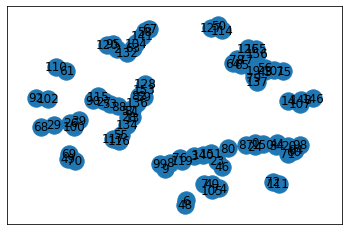

In [33]:
import os
import json
import pandas as pd
import numpy as np
import re
from janome.tokenizer import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt


# init100ディレクトリを指定
file_path = './corpus/japanese/'
file_dir = os.listdir(file_path)

# フラグと発話内容を抽出したリストを作成
label_text = []
for file in file_dir[:10]:
    r = open(file_path + file, 'r', encoding='utf-8')
    json_data = json.load(r)
    for turn in json_data['turns']:
        turn_index = turn['turn-index']
        speaker = turn['speaker']
        utterance = turn['utterance']
        if turn_index != 0:
            if speaker == 'U':
                u_text = utterance
            else:
                for annotate in turn['annotations']:
                    a = annotate['breakdown']
                    tmp1 = str(a) + '\t' + u_text
                    tmp2 = tmp1.split('\t')
                    label_text.append(tmp2)

# 重複を削除し、破綻ではない発話のみを抽出
df_label_text = pd.DataFrame(label_text)
df_label_text = df_label_text.drop_duplicates()
df_label_text_O = df_label_text[df_label_text[0] == 'O']

# Janomeによる形態素解析
t = Tokenizer()

morpO = []

for row in df_label_text_O.values.tolist():
    reg_row = re.sub('[0-9a-zA-Z]+', '', row[1])
    reg_row = reg_row.replace('\n', '')
    tmp1 = []
    tmp2 = ''
    for token in t.tokenize(reg_row):
        tmp1.append(token.surface)
        tmp2 = ' '.join(tmp1)
    morpO.append(tmp2)

# TF-IDF値による重みありの単語文書行列を作成
morpO_array = np.array(morpO)
tfidf_vecO = TfidfVectorizer(use_idf=True)
morpO_tfidf_vecs = tfidf_vecO.fit_transform(morpO_array)
morpO_tfidf_array = morpO_tfidf_vecs.toarray()

# DataFrame形式に変換し、相関行列を作成
dtmO = pd.DataFrame(morpO_tfidf_array)

corr_matrixO = dtmO.corr().abs()

# 破綻ではない発話データセットの作成
corr_stackO = corr_matrixO.stack()
index = pd.Series(corr_stackO.index.values)
value = pd.Series(corr_stackO.values)

tmp3 = []
tmp4 = []
for i in range(0, len(index)):
    if value[i] >= 0.5 and value[i] < 1.0:
        tmp1 = str(index[i][0]) + ' ' + str(index[i][1])
        tmp2 = [int(s) for s in tmp1.split()]
        tmp3.append(tmp2)
        tmp4 = np.append(tmp4, value[i])

tmp3 = pd.DataFrame(tmp3)
tmp3 = tmp3.rename(columns={0: 'node1', 1: 'node2'})
tmp4 = pd.DataFrame(tmp4)
tmp4 = tmp4.rename(columns={0: 'weight'})
df_corlistO = pd.concat([tmp3, tmp4], axis=1)

# 無向グラフを作成してください
G_corlistO = nx.from_pandas_edgelist(df_corlistO, 'node1', 'node2', ['weight'])

# 作成したグラフを可視化
# レイアウトの設定
pos = nx.spring_layout(G_corlistO)
nx.draw_networkx(G_corlistO, pos)
plt.show()

## 2.2.3 類似度ネットワークの特徴
2.2.2 で可視化したグラフのように、実際のネットワークは複雑な構造が多いため、一見して特徴を把握することは困難</br>
このような場合には、何らかの指標をもって定量的に特徴を把握</br>
その指標には、ネットワーク全体を把握するためのもの（大域的）もあれば、あるノードに着目して把握するもの（局所的）もある

- 次数：ノードが持つエッジの本数を表す
- 次数分布：ある次数を持つノード数のヒストグラムを表す
- クラスタ係数：ノード間がどの程度密に繋がっているかを表す
- 経路長：あるノードから他のノードへ至るまでの距離
- 中心性：あるノードがネットワークにおいて中心的な役割を果たす度合いを表す

2.2.2 で作成したネットワークについて、クラスタ係数と媒介中心性を計算し、特徴を見ていく</br>
このネットワークでは、クラスタ係数は単語間のつながり密度を、媒介中心性はネットワークにおける単語のハブ度合いを表す

破綻ではない発話と破綻である発話、それぞれのネットワークにおいて平均クラスタ係数を比較すると、</br>
破綻である発話の単語のほうが密につながっていることが分かる

媒介中心性の高い上位5単語を比較してみると、破綻ではない発話にはお盆休みに関する単語が、</br>
破綻である発話には早朝の野球に関する単語が中心的な役割を果たしていると推測できる

- 破綻ではない発話
    - <平均クラスタ係数>　0.051924357
    - <媒介中心性の高い上位5単語>
    - 休み、お盆、ここ、少ない、明け

- 破綻である発話
    - <平均クラスタ係数>　0.069563257
    - <媒介中心性の高い上位5単語>
    - 今度、ましょ、野球、早朝、かれ

- 平均クラスタ係数の計算
    - すべてのノードのクラスタ係数の平均が高いほど、そのネットワークは密であると言いえる
    - クラスタ係数の平均はnx.average_clustering()を用いて算出
    ```
    nx.average_clustering(G, weight=None)
    ```

- G
    - 重みとして使用する数値を持つエッジを指定
      Noneの場合、各エッジの重みは1になる

- 媒介中心性の計算
    - あるノードがすべてのノード間の最短経路中にいくつ含まれているかによって求められる
    つまり、情報を効率的に伝える際に最も利用されるノードほど媒介性が高く、中心的であると言える
    ```
    nx.betweenness_centrality(G, weight=None)
    ```


In [1]:
# 破綻ではない発話ネットワークに対し、平均クラスタ係数と媒介中心性を計算
import os
import json
import pandas as pd
import numpy as np
import re
from janome.tokenizer import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt


# init100ディレクトリを指定
file_path = './corpus/japanese/'
file_dir = os.listdir(file_path)

# フラグと発話内容を抽出したリストを作成
label_text = []
for file in file_dir[:10]:
    r = open(file_path + file, 'r', encoding='utf-8')
    json_data = json.load(r)
    for turn in json_data['turns']:
        turn_index = turn['turn-index']
        speaker = turn['speaker']
        utterance = turn['utterance']
        if turn_index != 0:
            if speaker == 'U':
                u_text = utterance
            else:
                for annotate in turn['annotations']:
                    a = annotate['breakdown']
                    tmp1 = str(a) + '\t' + u_text
                    tmp2 = tmp1.split('\t')
                    label_text.append(tmp2)

# 重複を削除し、破綻ではない発話のみを抽出
df_label_text = pd.DataFrame(label_text)
df_label_text = df_label_text.drop_duplicates()
df_label_text_O = df_label_text[df_label_text[0] == 'O']

# Janomeによる形態素解析
t = Tokenizer()

morpO = []

for row in df_label_text_O.values.tolist():
    reg_row = re.sub('[0-9a-zA-Z]+', '', row[1])
    reg_row = reg_row.replace('\n', '')
    tmp1 = []
    tmp2 = ''
    for token in t.tokenize(reg_row):
        tmp1.append(token.surface)
        tmp2 = ' '.join(tmp1)
    morpO.append(tmp2)

# TF-IDF値による重みありの単語文書行列を作成
morpO_array = np.array(morpO)
tfidf_vecO = TfidfVectorizer(use_idf=True)
morpO_tfidf_vecs = tfidf_vecO.fit_transform(morpO_array)
morpO_tfidf_array = morpO_tfidf_vecs.toarray()

# DataFrame形式に変換し、相関行列を作成
dtmO = pd.DataFrame(morpO_tfidf_array, columns=tfidf_vecO.get_feature_names_out(),
             index=morpO)
corr_matrixO = dtmO.corr().abs()

# 破綻ではない発話データセットの作成
corr_stackO = corr_matrixO.stack()
index = pd.Series(corr_stackO.index.values)
value = pd.Series(corr_stackO.values)

tmp3 = []
tmp4 = []
for i in range(0, len(index)):
    if value[i] >= 0.5 and value[i] < 1.0:
        tmp1 = str(index[i][0]) + ' ' + str(index[i][1])
        tmp2 = tmp1.split()
        tmp3.append(tmp2)
        tmp4 = np.append(tmp4, value[i])

tmp3 = pd.DataFrame(tmp3)
tmp3 = tmp3.rename(columns={0: 'node1', 1: 'node2'})
tmp4 = pd.DataFrame(tmp4)
tmp4 = tmp4.rename(columns={0: 'weight'})
df_corlistO = pd.concat([tmp3, tmp4], axis=1)

# 無向グラフを作成
G_corlistO = nx.from_pandas_edgelist(df_corlistO, 'node1', 'node2', ['weight'])

# 破綻ではない発話データセットに対して
# 平均クラスタ係数の計算をしてください
print('平均クラスタ係数')
print(nx.average_clustering(G_corlistO, weight='weight'))
print()

# 媒介中心性の計算をしてください
bc = nx.betweenness_centrality(G_corlistO, weight='weight')
print('媒介中心性')
for k, v in sorted(bc.items(), key=lambda x: -x[1]):
    print(str(k) + ': ' + str(v))

平均クラスタ係数
0.044062515499936034

媒介中心性
行っ: 0.02655771195097038
一泊: 0.022982635342185906
京都: 0.022727272727272728
行く: 0.018130745658835545
あり: 0.018130745658835545
人間: 0.013534218590398366
楽しい: 0.01327885597548519
にとって: 0.010980592441266599
一番: 0.010980592441266599
来る: 0.010725229826353423
いる: 0.008937691521961185
けど: 0.008937691521961185
くれれ: 0.008171603677221655
しまい: 0.007916241062308479
なる: 0.007916241062308479
かも: 0.006128702757916242
やっ: 0.006128702757916242
しれ: 0.006128702757916242
チーム: 0.0057456588355464765
応援: 0.0057456588355464765
そんな: 0.0057456588355464765
とき: 0.0057456588355464765
こと: 0.004596527068437181
食べ: 0.004341164453524005
ほか: 0.003575076608784474
一緒: 0.003575076608784474
可愛い: 0.002553626149131767
ロボット: 0.0022982635342185904
あまり: 0.001787538304392237
でも: 0.001787538304392237
なん: 0.001787538304392237
最近: 0.0015321756894790604
さみしい: 0.0012768130745658835
ませ: 0.0010214504596527069
てる: 0.0007660878447395302
蕎麦: 0.0007660878447395302
じゃ: 0.0007660878447395302
どちら: 0.000255362

## 2.2.4 類似度ネットワークのトピック抽出
一つのネットワークは、複数の部分ネットワーク（＝コミュニティ）によって成り立っている</br>
コミュニティ内の各ノードは、エッジで密につながっていることが特徴</br>
一つのネットワークの疎なエッジを取り除くと部分ネットワークに分割可能</br>
つまり、コミュニティが抽出できる＝類似度の高いネットワークの抽出ができるということ

ネットワークの分割には、モジュラリティ（Modularity）と呼ばれる指標を用いる
モジュラリティは、</br>
「一つのネットワークの総エッジ数に対するコミュニティ内のエッジ数の割合」から</br>
「一つのネットワークのすべてのノードの出次数の合計（ネットワークのエッジ数 × 2 と等しい）</br>
に対するコミュニティ内のノードの出次数の合計の割合」を引いた値で、分割の質を定量化する</br>

モジュラリティの値が大きいほど、コミュニティ内のノードは密につながっていると言える

- 破綻ではない発話
    お盆，しまい，ついつい，休み，切れ，困り，少ない，帰省，忘れ，怠け者，明け，続く，連休，集中
- 破綻である発話
    お願い，くらい，ぐらい，それから，とる，どの，はまっ，もちろん，よい，作業，偏ら，割り勘，危険，待っ，心掛け，時間，栄養，油断，睡眠，食事

### モジュラリティを用いたコミュニティの抽出
```
greedy_modularity_communities(G, weight=None)
```



In [4]:
import os
import json
import pandas as pd
import numpy as np
import re
from janome.tokenizer import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities


# init100ディレクトリを指定
file_path = './corpus/japanese/'
file_dir = os.listdir(file_path)

# フラグと発話内容を抽出したリストを作成
label_text = []
for file in file_dir[:20]:
    r = open(file_path + file, 'r', encoding='utf-8')
    json_data = json.load(r)
    for turn in json_data['turns']:
        turn_index = turn['turn-index']
        speaker = turn['speaker']
        utterance = turn['utterance']
        if turn_index != 0:
            if speaker == 'U':
                u_text = utterance
            else:
                for annotate in turn['annotations']:
                    a = annotate['breakdown']
                    tmp1 = str(a) + '\t' + u_text
                    tmp2 = tmp1.split('\t')
                    label_text.append(tmp2)

# 重複を削除し、破綻ではない発話のみを抽出
df_label_text = pd.DataFrame(label_text)
df_label_text = df_label_text.drop_duplicates()
df_label_text_O = df_label_text[df_label_text[0] == 'O']

# Janomeによる形態素解析
t = Tokenizer()

morpO = []

for row in df_label_text_O.values.tolist():
    reg_row = re.sub('[0-9a-zA-Z]+', '', row[1])
    reg_row = reg_row.replace('\n', '')
    tmp1 = []
    tmp2 = ''
    for token in t.tokenize(reg_row):
        tmp1.append(token.surface)
        tmp2 = ' '.join(tmp1)
    morpO.append(tmp2)

# TF-IDF値による重みありの単語文書行列を作成
morpO_array = np.array(morpO)
tfidf_vecO = TfidfVectorizer(use_idf=True)
morpO_tfidf_vecs = tfidf_vecO.fit_transform(morpO_array)
morpO_tfidf_array = morpO_tfidf_vecs.toarray()

# DataFrame形式に変換し、相関行列を作成
dtmO = pd.DataFrame(morpO_tfidf_array, columns=tfidf_vecO.get_feature_names_out(),
             index=morpO)
corr_matrixO = dtmO.corr().abs()

# 破綻ではない発話データセットの作成
corr_stackO = corr_matrixO.stack()
index = pd.Series(corr_stackO.index.values)
value = pd.Series(corr_stackO.values)

tmp3 = []
tmp4 = []
for i in range(0, len(index)):
    if value[i] >= 0.5 and value[i] < 1.0:
        tmp1 = str(index[i][0]) + ' ' + str(index[i][1])
        tmp2 = tmp1.split()
        tmp3.append(tmp2)
        tmp4 = np.append(tmp4, value[i])

tmp3 = pd.DataFrame(tmp3)
tmp3 = tmp3.rename(columns={0: 'node1', 1: 'node2'})
tmp4 = pd.DataFrame(tmp4)
tmp4 = tmp4.rename(columns={0: 'weight'})
df_corlistO = pd.concat([tmp3, tmp4], axis=1)

# 無向グラフを作成
G_corlistO = nx.from_pandas_edgelist(df_corlistO, 'node1', 'node2', ['weight'])

# 破綻ではない発話データセットに対して
# コミュニティ抽出をしてください
cm_corlistO = list(greedy_modularity_communities(G_corlistO, weight=None))

# 各コミュニティに属するノードの表示
cm_corlistO

[frozenset({'って',
            'もの',
            'カギ',
            '向上',
            '常に',
            '摂り',
            '栄養',
            '積極',
            '続け',
            '続ける',
            '考え',
            '読み',
            '難易',
            '高い'}),
 frozenset({'くれれ',
            'とか',
            'みたい',
            'やっ',
            'クエン',
            'ツッコミ',
            'パソコン',
            'ボケ',
            'ロボット',
            '塩分',
            '新しい',
            '欲しい'}),
 frozenset({'この',
            'すごい',
            'それ',
            '主婦',
            '予定',
            '今年',
            '夏休み',
            '懐かしい',
            '特に',
            '病気',
            '研究',
            '興味'}),
 frozenset({'お茶',
            'どんな',
            '仕事',
            '写真',
            '団子',
            '大好き',
            '撮り',
            '本当に',
            '緑茶',
            '美味しい',
            '葉桜',
            '蕎麦'}),
 frozenset({'かも', 'しまい', 'しれ', 'なく', 'にとって', '一番', '人間', '今朝', '寝坊', '来

# 単語の連続性から発話の特徴
Chapter1: 正規表現を用いた文字列の処理とJanomeによる分かち書きの課題
Chapter2: 単語の類似性に焦点を当て、データを加工し分析する方法
Chapter3: 単語の連続性に焦点を当てたデータ分析について

## 3.1 単語の連続性を知る
### 3.1.1 発話テキストの分かち書き

In [5]:
import os
import json
import pandas as pd
import re
from janome.tokenizer import Tokenizer


# 破綻ではない発話データセットの作成
file_path = './corpus/japanese/'
file_dir = os.listdir(file_path)

label_text = []
for file in file_dir[:10]:
    r = open(file_path + file, 'r', encoding='utf-8')
    json_data = json.load(r)
    for turn in json_data['turns']:
        turn_index = turn['turn-index']
        speaker = turn['speaker']
        utterance = turn['utterance']
        if turn_index != 0:
            if speaker == 'U':
                u_text = utterance
            else:
                for annotate in turn['annotations']:
                    a = annotate['breakdown']
                    tmp1 = str(a) + '\t' + u_text
                    tmp2 = tmp1.split('\t')
                    label_text.append(tmp2)

df_label_text = pd.DataFrame(label_text)
df_label_text = df_label_text.drop_duplicates()
df_label_text_O = df_label_text[df_label_text[0] == 'O']

t = Tokenizer()

# 分かち書きした単語を格納する空のリストを作成
wakatiO = []

# 1行ずつ読み込み
for row in df_label_text_O.values.tolist():

    # 正規表現で不要な文字列を除去してください
    # print(row)
    reg_row = re.sub("[0-9a-zA-Z]+", "", row[1])
    reg_row = reg_row.replace('\n', '')

    # Janomeで分かち書きして単語をリストへ格納
    tmp1 = t.tokenize(reg_row, wakati=True)
    wakatiO.append(tmp1)

# 分かち書きした単語を表示
print(wakatiO)

[<generator object Tokenizer.__tokenize_stream at 0x168829e40>, <generator object Tokenizer.__tokenize_stream at 0x168761120>, <generator object Tokenizer.__tokenize_stream at 0x168761580>, <generator object Tokenizer.__tokenize_stream at 0x16876c4a0>, <generator object Tokenizer.__tokenize_stream at 0x16876c270>, <generator object Tokenizer.__tokenize_stream at 0x16879a270>, <generator object Tokenizer.__tokenize_stream at 0x168795430>, <generator object Tokenizer.__tokenize_stream at 0x168793580>, <generator object Tokenizer.__tokenize_stream at 0x168748c10>, <generator object Tokenizer.__tokenize_stream at 0x1687489e0>, <generator object Tokenizer.__tokenize_stream at 0x16879c270>, <generator object Tokenizer.__tokenize_stream at 0x16879cf90>, <generator object Tokenizer.__tokenize_stream at 0x168768ac0>, <generator object Tokenizer.__tokenize_stream at 0x14771add0>, <generator object Tokenizer.__tokenize_stream at 0x1686def90>, <generator object Tokenizer.__tokenize_stream at 0x147

### 3.1.2 単語辞書の作成
数値化するために、単語にIDを付与するための変換リスト（辞書）を作成</br>
ここでは、単語の出現数が多い順に連番を付与する</br>

1.1.3 分析データの抽出 で作成したデータセットを分かち書きし、次に、単語の出現数をカウントして降順に並べ替え
- 単語の出現数のカウント
    - 単語の出現数をカウントするには、Python標準ライブラリのCounterクラスとitertools.chain()を用いる
- Counter
    - 数値化するために、単語にIDを付与するための変換リスト（辞書）を作成
    ここでは、単語の出現数が多い順に連番を付与する
    - collections.Counter()にリストやタプルを渡すと、キーに要素、値に出現回数を持つCounterオブジェクトが生成
    - 辞書型のメソッドを使用することができ、キーのリスト keys()、値のリスト values()、キーと値のペアのタプルのリスト items() を取得
- 単語の並び替え
    - 単語を並び替えるには、most_common(n)を用いる
    - 個数が多い順から少ない順に並べたリストをタプルで返す
    - nを指定すると個数が多い方からn個のタプルを返し、nを省略するとすべての要素を返す


In [7]:
import os
import json
import pandas as pd
import re
from janome.tokenizer import Tokenizer
from collections import Counter
import itertools

# 破綻ではない発話データセットの作成
file_path = './corpus/japanese/'
file_dir = os.listdir(file_path)

label_text = []
for file in file_dir[:10]:
    r = open(file_path + file, 'r', encoding='utf-8')
    json_data = json.load(r)
    for turn in json_data['turns']:
        turn_index = turn['turn-index']
        speaker = turn['speaker']
        utterance = turn['utterance']
        if turn_index != 0:
            if speaker == 'U':
                u_text = utterance
            else:
                for annotate in turn['annotations']:
                    a = annotate['breakdown']
                    tmp1 = str(a) + '\t' + u_text
                    tmp2 = tmp1.split('\t')
                    label_text.append(tmp2)

df_label_text = pd.DataFrame(label_text)
df_label_text = df_label_text.drop_duplicates()
df_label_text_O = df_label_text[df_label_text[0] == 'O']

# 分かち書きし、正規表現で不要な文字列を除去
t = Tokenizer()
wakatiO = []
for row in df_label_text_O.values.tolist():
    reg_row = re.sub('[0-9a-zA-Z]+', '', row[1])
    reg_row = reg_row.replace('\n', '')
    tmp1 = t.tokenize(reg_row, wakati=True)
    wakatiO.append(tmp1)

# 単語の出現数をカウントしてください
# word_freq = Counter([_ for i in range(len(wakatiO)) for _ in wakatiO[i]])
word_freq = Counter(itertools.chain(*wakatiO))

# 単語を出現数順に並べ替え、dicに追加してください
dic = []
for word_uniq in word_freq.most_common():
    dic.append(word_uniq[0])

# 単語にIDを付与し辞書を作成
# enumerate(dic) は、for文を使用して`dic`からインデックスを`i`、要素を`word_uniq`に取得
dic_inv = {}
for i, word_uniq in enumerate(dic, start=1):
    dic_inv.update({word_uniq: i})

# 辞書の表示
print(dic_inv)

{'です': 1, 'か': 2, '。': 3, 'は': 4, 'ます': 5, '？': 6, 'ね': 7, '好き': 8, 'が': 9, 'て': 10, 'を': 11, 'の': 12, 'し': 13, 'た': 14, '何': 15, 'に': 16, '、': 17, 'ない': 18, 'な': 19, 'と': 20, 'ん': 21, 'まし': 22, 'よ': 23, 'そう': 24, 'で': 25, 'も': 26, 'お': 27, 'こんにちは': 28, 'い': 29, 'こと': 30, 'そうですね': 31, 'あなた': 32, '犬': 33, 'どちら': 34, 'いい': 35, 'あり': 36, 'スポーツ': 37, 'はい': 38, 'じゃ': 39, 'ませ': 40, '見': 41, '今日': 42, '飼っ': 43, '私': 44, '休み': 45, '飲み': 46, 'いる': 47, 'どの': 48, '話': 49, 'あまり': 50, '気': 51, '方': 52, '人': 53, 'さみしい': 54, '人間': 55, '楽しい': 56, 'かも': 57, 'しれ': 58, '食べ': 59, 'よく': 60, '天気': 61, '暑い': 62, '猫': 63, '可愛い': 64, 'なん': 65, 'でも': 66, 'てる': 67, 'どこ': 68, 'へ': 69, 'れ': 70, '蕎麦': 71, '日': 72, 'なる': 73, 'ロボット': 74, 'やっ': 75, 'なっ': 76, 'しまい': 77, '酒': 78, 'けど': 79, '行く': 80, '京都': 81, '行っ': 82, '仕事': 83, 'サッカー': 84, 'ゴルフ': 85, 'たい': 86, '済み': 87, '使っ': 88, 'だ': 89, '思い': 90, '嫌い': 91, '一': 92, 'にとって': 93, '一番': 94, 'ほか': 95, '一緒': 96, '上品': 97, '感じ': 98, '会い': 99, 'たかっ': 100, '了解': 101, 'どういたしまし

### 3.1.3 単語を数値へ変換
破綻ではない発話データセットに対し、作成した辞書を用いて単語をIDへ変換し、新たな配列に格納</br>
なお、破綻ではない発話データセットは 3.1.1: 発話テキストの分かち書き で作成したデータセットを用い、</br>
作成した辞書には 3.1.2 単語辞書の作成 で作成した辞書</br>

- 後半のfor waka in wakatiOは、
    - wakatiOの単語リストを1つずつwakaに渡します。
- 中間のfor word in wakaは、
    - wakaの単語リストを1単語ずつwordに渡します。
- 前半のdic_inv[word]は、
    - wordに対応するIDを辞書dic_invから取得します。


In [34]:
import os
import json
import pandas as pd
import re
from janome.tokenizer import Tokenizer
from collections import Counter
import itertools


# 破綻ではない発話データセットの作成
file_path = './corpus/japanese/'
file_dir = os.listdir(file_path)

label_text = []
for file in file_dir[:10]:
    r = open(file_path + file, 'r', encoding='utf-8')
    json_data = json.load(r)
    for turn in json_data['turns']:
        turn_index = turn['turn-index']
        speaker = turn['speaker']
        utterance = turn['utterance']
        if turn_index != 0:
            if speaker == 'U':
                u_text = utterance
            else:
                for annotate in turn['annotations']:
                    a = annotate['breakdown']
                    tmp1 = str(a) + '\t' + u_text
                    tmp2 = tmp1.split('\t')
                    label_text.append(tmp2)

df_label_text = pd.DataFrame(label_text)
df_label_text = df_label_text.drop_duplicates()
df_label_text_O = df_label_text[df_label_text[0] == 'O']

# 分かち書きし、正規表現で不要な文字列を除去
t = Tokenizer()
wakatiO = []
for row in df_label_text_O.values.tolist():
    reg_row = re.sub('[0-9a-zA-Z]+', '', row[1])
    reg_row = reg_row.replace('\n', '')
    tmp1 = t.tokenize(reg_row, wakati=True)
    wakatiO.append(list(tmp1))

# 単語の出現数をカウント、並べ替え、dicに追加
word_freq = Counter(itertools.chain(*wakatiO))
dic = []
for word_uniq in word_freq.most_common():
    dic.append(word_uniq[0])

# 単語にIDを付与し辞書を作成
# enumerate(dic) は、for文を使用して`dic`からインデックスを`i`、要素を`word_uniq`に取得します
dic_inv = {}
for i, word_uniq in enumerate(dic, start=1):
    dic_inv.update({word_uniq: i})
# 単語をIDへ変換してください
wakatiO_n = [[dic_inv[word] for word in waka] for waka in wakatiO]
print(wakatiO_n)

[[28, 3], [15, 12, 49, 9, 13, 86, 12, 1, 2, 6], [38, 3, 87, 22, 14, 23, 3], [50, 51, 11, 88, 10, 29, 18, 52, 89, 20, 90, 5, 3], [91, 1, 3], [92, 53, 39, 54, 39, 18, 1, 2, 3], [55, 93, 4, 94, 56, 30, 57, 58, 40, 21, 7], [31, 3, 95, 12, 53, 20, 96, 16, 59, 14, 52, 9, 56, 1, 7, 3], [97, 19, 98, 1, 23, 7, 3], [24, 1, 3], [28, 3, 99, 100, 14, 1], [8, 1, 23, 3, 32, 4, 6], [60, 41, 5], [101], [102], [103], [15, 25, 26, 18, 23], [104], [27, 61, 12, 49], [105], [28, 3, 42, 26, 62, 1, 7, 3], [33, 9, 8, 1, 3, 106, 33, 11, 43, 10, 29, 5, 3, 32, 4, 33, 20, 63, 25, 4, 34, 9, 8, 1, 2, 3], [64, 1, 7, 3, 107, 4, 8, 1, 2, 3], [31, 3, 32, 4, 15, 2, 43, 10, 29, 5, 2, 3], [31, 3, 108, 1, 7, 3], [33, 4, 65, 66, 64, 1, 23, 3], [63, 4, 8, 1, 2, 3], [8, 24, 1, 7, 3, 43, 67, 21, 1, 2, 3], [28], [68, 69, 109, 70, 5, 2, 6], [110, 9, 35, 1, 7], [111, 5, 2, 6], [8, 19, 112, 4, 15, 1, 2, 6], [113, 13, 10, 29, 5, 2, 6], [114, 25, 26, 13, 22, 14, 2, 6], [44, 4, 27, 71, 9, 115, 1], [27, 71, 4, 116, 1, 117, 7], [45, 12,

## 3.2 単語の連続性からテキストの特徴を知る
### 3.2.1 N-gramとは
自然言語データを解析するとき、目的がテキストを分類することであれば、単語データから 単語文書行列 を作成</br>
目的がテキストからトピックを抽出することであれば、N-gramモデル を作成</br>

N-gram とは、テキストを連続したN個の文字で分割する方法</br>
身近な例では、検索システムのインデックスとして使用
- N=1のとき: 1-gram (ユニグラム)
- N=2のとき: 2-gram (バイグラム)
- N=3のとき: 3-gram (トリグラム)

```
【テキスト】あいうえお
【 1-gram 】あ | い | う | え | お
【 2-gram 】あい | いう | うえ | えお
【 3-gram 】あいう | いうえ | うえお

【テキスト】今日は晴れです。
【 1-gram 】今日 | は | 晴れ | です | 。
【 2-gram 】今日-は | は-晴れ | 晴れ-です | です-。
【 3-gram 】今日-は-晴れ | は-晴れ-です | 晴れ-です-。
```

単語文書行列が同じテキストに含まれる単語の共起性（同じ文中に出現するか）を表すことに対し、</br>
N-gramは単語の連続性（どの順番で出現するか）を表す</br>
本コースでは単語からトピックを抽出し分析を行いたいため、後者のN-gramモデル、特に2-gramモデルを作成する
```
# 簡単な例で2-gramモデルを作成
word = ['今日', 'は', '晴れ', 'です', '。']
bigram = []
for i in range(len(word)-1):
    bigram.append([word[i], word[i+1]])
print(bigram)
```

In [37]:
trigram = []
word = ['今日', 'は', '晴れ', 'です', '。']
# 3-gramモデルを作成
for i in range(len(word)-2):
    trigram.append([word[i], word[i+1], word[i+2]])
print(trigram)

[['今日', 'は', '晴れ'], ['は', '晴れ', 'です'], ['晴れ', 'です', '。']]


### 3.2.2 2-gramリストの作成
3.1.3 単語を数値へ変換 で作成した単語をIDに変換したデータセットから2-gramリストを作成</br>
2-gramリストの作成には、DataFrameに対してグループ化を行うgroupby()と、合計値を算出するsum()を用いる</br>

```python
from pandas import DataFrame
# DataFrameを用意
df=DataFrame([['AA','Camela',150000,20000],
              ['BB','Camera',70000,10000],
              ['AA','earphone',2000,200],
              ['AA','Video',3000,150],
              ['BB','earphone',200000,8000],
              ['BB','Camera',50000,5000],
              ['AA','Video',1000,200]],
              columns=['CUSTOMER','PRODUCT','PRICE','DISCOUNT'])
# 1つの条件でgroupbyし、sumを算出
grouped = df.groupby('CUSTOMER').sum()
grouped
# 複数の条件でgroupbyし、sumを算出
grouped = df.groupby(['CUSTOMER','PRODUCT']).sum()
grouped
```
2-gramリストの作成において、重複する2-gramは複数回出現しているということなので、重要な組み合わせである</br>
groupby()でグループ化し、合わせてsum()で出現回数（＝重み）を計算

In [49]:
import os
import json
import pandas as pd
import re
from janome.tokenizer import Tokenizer
from collections import Counter
import itertools


# 破綻ではない発話データセットの作成
file_path = './corpus/japanese/'
file_dir = os.listdir(file_path)

label_text = []
for file in file_dir[:10]:
    r = open(file_path + file, 'r', encoding='utf-8')
    json_data = json.load(r)
    for turn in json_data['turns']:
        turn_index = turn['turn-index']
        speaker = turn['speaker']
        utterance = turn['utterance']
        if turn_index != 0:
            if speaker == 'U':
                u_text = utterance
            else:
                for annotate in turn['annotations']:
                    a = annotate['breakdown']
                    tmp1 = str(a) + '\t' + u_text
                    tmp2 = tmp1.split('\t')
                    label_text.append(tmp2)

df_label_text = pd.DataFrame(label_text)
df_label_text = df_label_text.drop_duplicates()
df_label_text_O = df_label_text[df_label_text[0] == 'O']

# 分かち書きし、正規表現で不要な文字列を除去
t = Tokenizer()
wakatiO = []
for row in df_label_text_O.values.tolist():
    reg_row = re.sub('[0-9a-zA-Z]+', '', row[1])
    reg_row = reg_row.replace('\n', '')
    tmp1 = t.tokenize(reg_row, wakati=True)
    wakatiO.append(list(tmp1))

# 単語の出現数をカウント、並べ替え、dicに追加
word_freq = Counter(itertools.chain(*wakatiO))
dic = []
for word_uniq in word_freq.most_common():
    dic.append(word_uniq[0])

# 単語にIDを付与し辞書を作成
dic_inv = {}
for i, word_uniq in enumerate(dic, start=1):
    dic_inv.update({word_uniq: i})

# 単語をIDへ変換
wakatiO_n = [[dic_inv[word] for word in waka] for waka in wakatiO]

# 2-gramリストを作成
bigramO = []

for i in range(0, len(wakatiO_n)):
    row = wakatiO_n[i]
    # 2-gramの作成
    tmp = []
    for j in range(len(row)-1):
        tmp.append([row[j], row[j+1]])
    bigramO.extend(tmp)

# 重複する2-gramの個数をカウントし、DataFrame形式で表現します
# 配列`bigramO`をDataFrameに変換しcolumnを設定
df_bigramO = pd.DataFrame(bigramO)
df_bigramO = df_bigramO.rename(columns={0: 'node1', 1: 'node2'})

# `weight`列を追加し、値を1で統一する
df_bigramO['weight'] = 1

# 2-gram個数をカウントしてください
df_bigramO = df_bigramO.groupby(["node1", "node2"], as_index=False).sum()

# 出現数が1を超えるリストを抽出します
# 出現数=`weight`のsum値
df_bigramO = df_bigramO[df_bigramO['weight'] > 1]

# 2-gramの表示
df_bigramO.head(10)

,node1,node2,weight
0,1,2,32
1,1,3,4
2,1,7,13
4,1,23,4
6,2,3,9
7,2,6,17
11,3,32,3
12,3,42,3
26,4,8,6
27,4,15,6


### 3.2.3 2-gramネットワークの作成
Chapter2では、単語をノード、単語間の類似度 をエッジとその重みとして、無向グラフを作成した</br>
本Chapterでは、単語をノード、単語ペアの出現回数 をエッジとその重みとして、有向グラフ（有向ネットワーク）を作成する</br>
有向グラフは、出現順 に意味があると考える</br>
例として、単語の出現順や、組織内のコミュニケーションのやり取りが挙げられる

- 有向グラフ（有向ネットワーク）の作成
    - 無向グラフの作成に用いた、nx.from_pandas_edgelist()の引数にnx.DiGraphを追加して指定
    ```python
    G_corlistO = nx.from_pandas_edgelist(df_corlistO, 'node1', 'node2', ['weight'], nx.DiGraph)
    ```
- グラフ（ネットワーク）の可視化
    - 無向グラフの可視化とまったく同様
    ```python
    # ライブラリ`Matplotlib`から`pyplot`をimport
    from matplotlib import pyplot

    # 各ノードの最適な表示位置を計算
    pos = nx.spring_layout(graph)

    # グラフを描画
    nx.draw_networkx(graph, pos)

    # Matplolibを用いてグラフを表示
    plt.show()
    ```

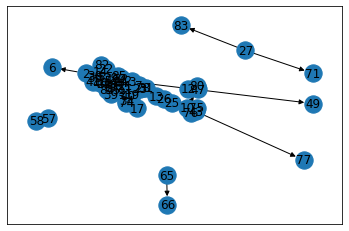

In [53]:
import os
import json
import pandas as pd
import re
from janome.tokenizer import Tokenizer
from collections import Counter
import itertools
import networkx as nx
import matplotlib.pyplot as plt


# 破綻ではない発話データセットの作成
file_path = './corpus/japanese/'
file_dir = os.listdir(file_path)

label_text = []
for file in file_dir[:10]:
    r = open(file_path + file, 'r', encoding='utf-8')
    json_data = json.load(r)
    for turn in json_data['turns']:
        turn_index = turn['turn-index']
        speaker = turn['speaker']
        utterance = turn['utterance']
        if turn_index != 0:
            if speaker == 'U':
                u_text = utterance
            else:
                for annotate in turn['annotations']:
                    a = annotate['breakdown']
                    tmp1 = str(a) + '\t' + u_text
                    tmp2 = tmp1.split('\t')
                    label_text.append(tmp2)

df_label_text = pd.DataFrame(label_text)
df_label_text = df_label_text.drop_duplicates()
df_label_text_O = df_label_text[df_label_text[0] == 'O']

# 分かち書きし、正規表現で不要な文字列を除去
t = Tokenizer()
wakatiO = []
for row in df_label_text_O.values.tolist():
    reg_row = re.sub('[0-9a-zA-Z]+', '', row[1])
    reg_row = reg_row.replace('\n', '')
    tmp1 = t.tokenize(reg_row, wakati=True)
    wakatiO.append(list(tmp1))

# 単語の出現数をカウント、並べ替え、dicに追加
word_freq = Counter(itertools.chain(*wakatiO))
dic = []
for word_uniq in word_freq.most_common():
    dic.append(word_uniq[0])

# 単語にIDを付与し辞書を作成
dic_inv = {}
for i, word_uniq in enumerate(dic, start=1):
    dic_inv.update({word_uniq: i})

# 単語をIDへ変換
wakatiO_n = [[dic_inv[word] for word in waka] for waka in wakatiO]

# 2-gramリストを作成
bigramO = []

for i in range(0, len(wakatiO_n)):
    row = wakatiO_n[i]
    # 2-gramの作成
    tmp = []
    for j in range(len(row)-1):
        tmp.append([row[j], row[j+1]])
    bigramO.extend(tmp)

# 配列`bigramO`をDataFrameに変換しcolumnを設定
df_bigramO = pd.DataFrame(bigramO)
df_bigramO = df_bigramO.rename(columns={0: 'node1', 1: 'node2'})

# `weight`列を追加し、値を1で統一する
df_bigramO['weight'] = 1

# 2-gram個数をカウント
df_bigramO = df_bigramO.groupby(['node1', 'node2'], as_index=False).sum()

# 出現数が1を超えるリストを抽出
df_bigramO = df_bigramO[df_bigramO['weight'] > 1]

# 有向グラフを作成してください
G_bigramO = nx.from_pandas_edgelist(df_bigramO, 'node1', 'node2', ['weight'], nx.DiGraph)

# 作成したグラフを可視化
# レイアウトの設定
pos = nx.spring_layout(G_bigramO)
nx.draw_networkx(G_bigramO, pos)
plt.show()

### 3.2.4 2-gramネットワークの特徴
有向グラフであっても考え方は無向グラフと同様</br>
3.2.3 2-gramネットワークの作成 で可視化したグラフを一見しても特徴を把握することは困難なので、指標を用いて定量的に特徴を把握</br>
ここでもクラスタ係数と媒介中心性を計算する
- 平均クラスタ係数の計算
    - すべてのノードのクラスタ係数の平均が高いほど、そのネットワークは密である
    - クラスタ係数の平均はnx.average_clustering()を用いて算出
    ```
    # G: graphを指定
    nx.average_clustering(G, weight=None)
    ```
- 媒介中心性の計算
    - あるノードがすべてのノード間の最短経路中にいくつ含まれているかによって求められる
    - 情報を効率的に伝える際に最も利用されるノードほど媒介性が高く、中心的である
    - 媒介中心性の計算はnx.betweenness_centrality()を用いて算出
    ```
    # G: graphを指定
    nx.betweenness_centrality(G, weight=None)
    ```

In [62]:
import os
import json
import pandas as pd
import re
from janome.tokenizer import Tokenizer
from collections import Counter
import itertools
import networkx as nx
import matplotlib.pyplot as plt


# 破綻ではない発話データセットの作成
file_path = './corpus/japanese/'
file_dir = os.listdir(file_path)

label_text = []
for file in file_dir[:10]:
    r = open(file_path + file, 'r', encoding='utf-8')
    json_data = json.load(r)
    for turn in json_data['turns']:
        turn_index = turn['turn-index']
        speaker = turn['speaker']
        utterance = turn['utterance']
        if turn_index != 0:
            if speaker == 'U':
                u_text = utterance
            else:
                for annotate in turn['annotations']:
                    a = annotate['breakdown']
                    tmp1 = str(a) + '\t' + u_text
                    tmp2 = tmp1.split('\t')
                    label_text.append(tmp2)

df_label_text = pd.DataFrame(label_text)
df_label_text = df_label_text.drop_duplicates()
df_label_text_O = df_label_text[df_label_text[0] == 'O']

# 分かち書きし、正規表現で不要な文字列を除去
t = Tokenizer()
wakatiO = []
for row in df_label_text_O.values.tolist():
    reg_row = re.sub('[0-9a-zA-Z]+', '', row[1])
    reg_row = reg_row.replace('\n', '')
    tmp1 = t.tokenize(reg_row, wakati=True)
    wakatiO.append(list(tmp1))

# 単語の出現数をカウント、並べ替え、dicに追加
word_freq = Counter(itertools.chain(*wakatiO))
dic = []
for word_uniq in word_freq.most_common():
    dic.append(word_uniq[0])

# 単語にIDを付与し辞書を作成
dic_inv = {}
for i, word_uniq in enumerate(dic, start=1):
    dic_inv.update({word_uniq: i})

# 単語をIDへ変換
wakatiO_n = [[dic_inv[word] for word in waka] for waka in wakatiO]

# 2-gramリストを作成
bigramO = []

for i in range(0, len(wakatiO_n)):
    row = wakatiO_n[i]
    # 2-gramの作成
    tmp = []
    for j in range(len(row)-1):
        tmp.append([row[j], row[j+1]])
    bigramO.extend(tmp)

# 配列`bigramO`をDataFrameに変換しcolumnを設定
df_bigramO = pd.DataFrame(bigramO)
df_bigramO = df_bigramO.rename(columns={0: 'node1', 1: 'node2'})

# `weight`列を追加し、値を1で統一する
df_bigramO['weight'] = 1

# 2-gram個数をカウント
df_bigramO = df_bigramO.groupby(['node1', 'node2'], as_index=False).sum()

# 出現数が1を超えるリストを抽出
df_bigramO = df_bigramO[df_bigramO['weight'] > 1]

# 有向グラフの作成
G_bigramO = nx.from_pandas_edgelist(
    df_bigramO, 'node1', 'node2', ['weight'], nx.DiGraph)

# 破綻ではない発話ネットワーク
# 平均クラスタ係数の計算をしてください
print('平均クラスタ係数')
print(nx.average_clustering(G_bigramO, weight=None))
print()

# 媒介中心性の計算をしてください
bc = nx.betweenness_centrality(G_bigramO, weight=None)
print('媒介中心性')
for k, v in sorted(bc.items(), key=lambda x: -x[1]):
    print(str(k) + ': ' + str(v))

平均クラスタ係数
0.021748557955454502

媒介中心性
4: 0.2825814536340852
3: 0.2731829573934837
1: 0.15105472013366747
15: 0.14196950710108602
32: 0.1262531328320802
42: 0.1262531328320802
5: 0.1112155388471178
11: 0.11058897243107768
13: 0.10056390977443608
10: 0.09649122807017543
8: 0.07012322472848788
14: 0.044486215538847115
82: 0.041353383458646614
12: 0.03884711779448621
30: 0.03853383458646616
47: 0.03571428571428571
36: 0.03258145363408521
9: 0.02568922305764411
29: 0.02506265664160401
34: 0.022556390977443608
2: 0.018431495405179615
21: 0.017230576441102756
19: 0.014097744360902255
7: 0.010651629072681704
18: 0.009085213032581453
26: 0.009085213032581453
46: 0.007518796992481203
23: 0.0
6: 0.0
77: 0.0
49: 0.0
17: 0.0
22: 0.0
24: 0.0
25: 0.0
27: 0.0
71: 0.0
83: 0.0
28: 0.0
31: 0.0
35: 0.0
39: 0.0
40: 0.0
41: 0.0
43: 0.0
44: 0.0
57: 0.0
58: 0.0
62: 0.0
64: 0.0
65: 0.0
66: 0.0
74: 0.0
75: 0.0
76: 0.0
80: 0.0
84: 0.0
85: 0.0


### 3.2.5 2-gramネットワークの影響関係
2.2.3 類似度ネットワークの特徴、3.2.4 2-gramネットワークの特徴 では、</br>
ネットワークの特徴を定量的に把握する指標をいくつか実装した</br>

さらに、次数分布 を用いて各単語がどう影響し合っているかを見てみる</br>
有向ネットワークでは単語ノードが向きを持つため、以下のように分けて考える
- 入次数
    - ある単語が他の単語から影響を受ける
    - 入次数（indegree）とは、有向グラフでは、頂点に入ってくる辺数を言い、無向グラフでは、接続辺の数を指す
    - method: in_degree()
    - result: (node番号, 入次数) の形式
    ```
    # G_bigramOの入次数を調べる
    print(G_bigramO.in_degree(weight='weight'))
    ```
- 出次数
    - ある単語が他の単語へ影響を与える
    - 出次数（outdegree）とは、有向グラフでは、頂点から出て行く辺数を言い、無向グラフでは、接続辺の数を指す
    - method: out_degree()
    - result: (node番号, 出次数) の形式
    ```
    # G_bigramOの出次数を調べる
    print(G_bigramO.out_degree(weight='weight'))
    ```


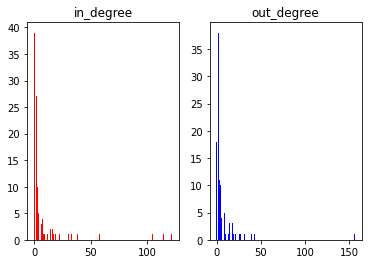

In [66]:
import os
import json
import pandas as pd
import re
from janome.tokenizer import Tokenizer
from collections import Counter
import itertools
import networkx as nx
import matplotlib.pyplot as plt


# 破綻ではない発話データセットの作成
file_path = './corpus/japanese/'
file_dir = os.listdir(file_path)

label_text = []
for file in file_dir[:100]:
    r = open(file_path + file, 'r', encoding='utf-8')
    json_data = json.load(r)
    for turn in json_data['turns']:
        turn_index = turn['turn-index']
        speaker = turn['speaker']
        utterance = turn['utterance']
        if turn_index != 0:
            if speaker == 'U':
                u_text = utterance
            else:
                for annotate in turn['annotations']:
                    a = annotate['breakdown']
                    tmp1 = str(a) + '\t' + u_text
                    tmp2 = tmp1.split('\t')
                    label_text.append(tmp2)

df_label_text = pd.DataFrame(label_text)
df_label_text = df_label_text.drop_duplicates()
df_label_text_O = df_label_text[df_label_text[0] == 'O']

# 分かち書きし、正規表現で不要な文字列を除去
t = Tokenizer()
wakatiO = []
for row in df_label_text_O.values.tolist():
    reg_row = re.sub('[0-9a-zA-Z]+', '', row[1])
    reg_row = reg_row.replace('\n', '')
    tmp1 = t.tokenize(reg_row, wakati=True)
    wakatiO.append(list(tmp1))

# 単語の出現数をカウント、並べ替え、dicに追加
word_freq = Counter(itertools.chain(*wakatiO))
dic = []
for word_uniq in word_freq.most_common():
    dic.append(word_uniq[0])

# 単語にIDを付与し辞書を作成
dic_inv = {}
for i, word_uniq in enumerate(dic, start=1):
    dic_inv.update({word_uniq: i})

# 単語をIDへ変換
wakatiO_n = [[dic_inv[word] for word in waka] for waka in wakatiO]

# 2-gramリストを作成
bigramO = []

for i in range(0, len(wakatiO_n)):
    row = wakatiO_n[i]
    # 2-gramの作成
    tmp = []
    for j in range(len(row)-1):
        tmp.append([row[j], row[j+1]])
    bigramO.extend(tmp)

# 配列`bigramO`をDataFrameに変換しcolumnを設定
df_bigramO = pd.DataFrame(bigramO)
df_bigramO = df_bigramO.rename(columns={0: 'node1', 1: 'node2'})

# `weight`列を追加し、値を1で統一する
df_bigramO['weight'] = 1

# 2-gram個数をカウント
df_bigramO = df_bigramO.groupby(['node1', 'node2'], as_index=False).sum()

# 出現数が1を超えるリストを抽出
df_bigramO = df_bigramO[df_bigramO['weight'] > 1]

# 有向グラフの作成
G_bigramO = nx.from_pandas_edgelist(
    df_bigramO, 'node1', 'node2', ['weight'], nx.DiGraph)

# 破綻ではない発話ネットワーク
# 入次数の度数を求めてください
indegree = sorted([d for n, d in G_bigramO.in_degree(weight='weight')], reverse=True)
indegreeCount = Counter(indegree)
indeg, in_cnt = zip(*indegreeCount.items())

# 出次数の度数を求めてください
outdegree = sorted([d for n, d in G_bigramO.out_degree(weight='weight')], reverse=True)
outdegreeCount = Counter(outdegree)
outdeg, out_cnt = zip(*outdegreeCount.items())

# print(indeg)
# print(in_cnt)
# print(outdeg)
# print(out_cnt)

# 次数分布の作成
plt.subplot(1, 2, 1)
plt.bar(indeg, in_cnt, color='r')
plt.title('in_degree')
plt.subplot(1, 2, 2)
plt.bar(outdeg, out_cnt, color='b')
plt.title('out_degree')
plt.show()